In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
from IPython.display import clear_output

import trajectory_falling as tj
from trajectory_falling import Droping


# free falling
theta1 = 0, theta2 = pi/2:

shape of M: (2, 2)
shape of c: (2, 1)
shape of g: (2, 1)
shape of tau: (2, 1)


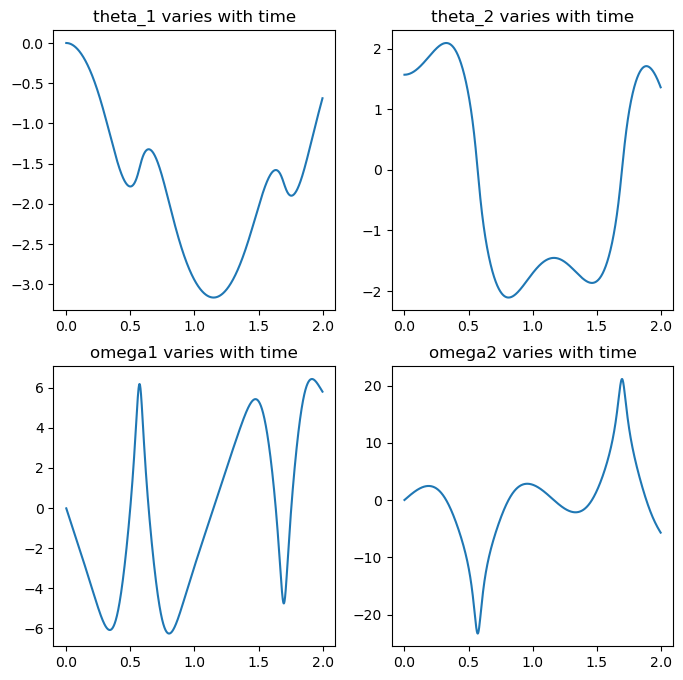

In [19]:
# simulate 1 seconds
steps = 2000
T = 0.001
time = np.arange(0, steps*T, T)


d1 = Droping(T = T, theta1 = 0, theta2 = np.pi/2)
# theta_1, theta_2, theta_1_dot, theta_2_dot
x1s1,x2s1, x3s1, x4s1 = d1.forward(steps)


plt.figure(figsize=(8,8))
plt.subplot(221)
plt.plot(time, x1s1)
plt.title('theta_1 varies with time')
plt.subplot(222)
plt.plot(time, x2s1)
plt.title('theta_2 varies with time')
plt.subplot(223)
plt.plot(time, x3s1)
plt.title('omega1 varies with time')
plt.subplot(224)
plt.plot(time, x4s1)
plt.title('omega2 varies with time')
plt.show()


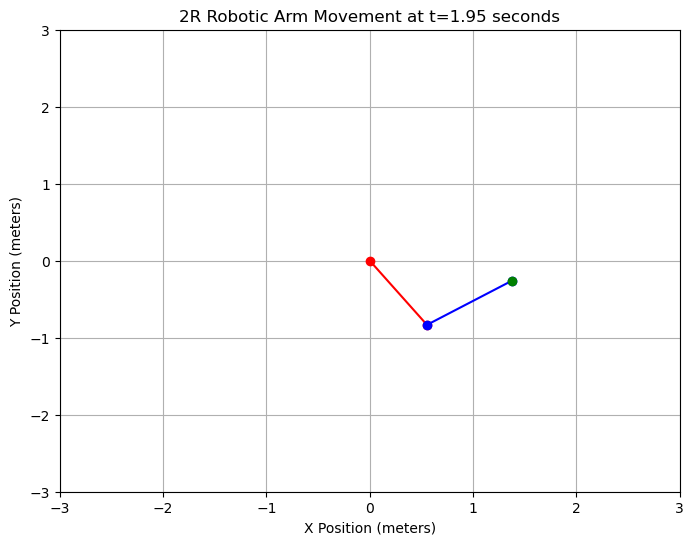

In [20]:
tj.plot_robot_arm_dynamics(steps, x1s1, x2s1, 1, 1, step=50)

theta1 = 0, theta2 = -pi/2:

shape of M: (2, 2)
shape of c: (2, 1)
shape of g: (2, 1)
shape of tau: (2, 1)


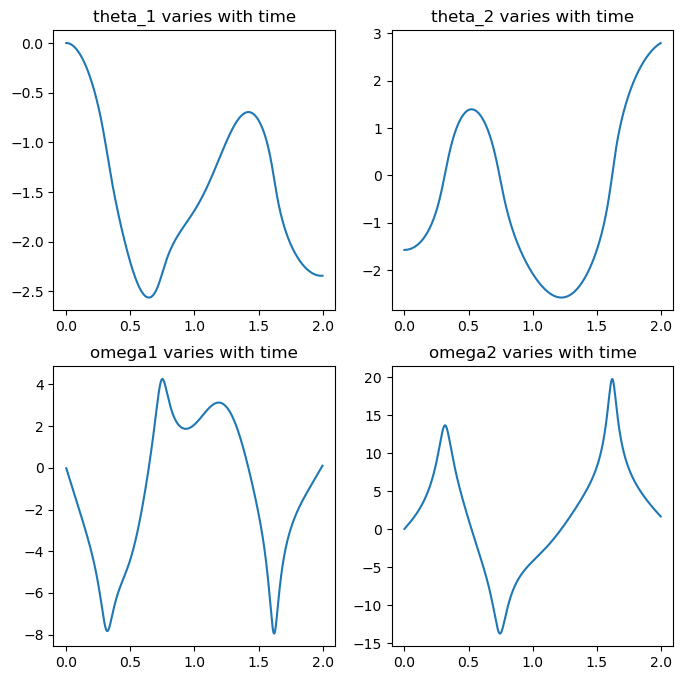

In [21]:
d2 = Droping(T = T, theta1 = 0, theta2 = -np.pi/2)
# theta_1, theta_2, theta_1_dot, theta_2_dot
x1s2,x2s2, x3s2, x4s2 = d2.forward(steps)

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.plot(time, x1s2)
plt.title('theta_1 varies with time')
plt.subplot(222)
plt.plot(time, x2s2)
plt.title('theta_2 varies with time')
plt.subplot(223)
plt.plot(time, x3s2)
plt.title('omega1 varies with time')
plt.subplot(224)
plt.plot(time, x4s2)
plt.title('omega2 varies with time')
plt.show()

Animation:

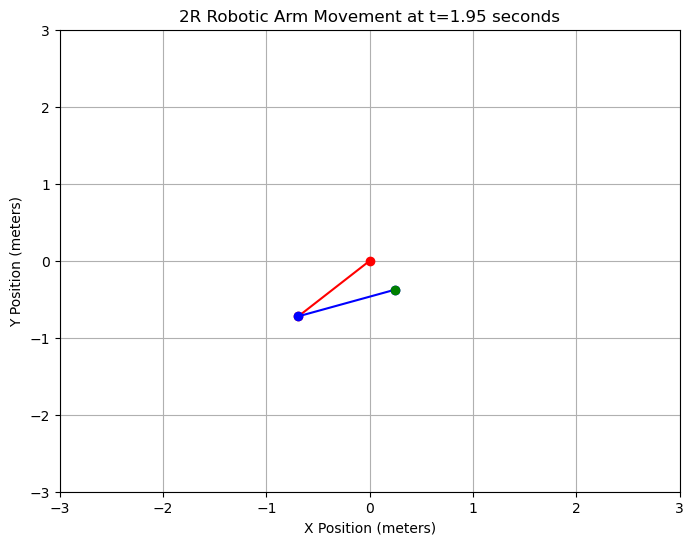

In [22]:
tj.plot_robot_arm_dynamics(steps, x1s2, x2s2, 1, 1, step=50)

# Identification


shape of M: (2, 2)
shape of c: (2, 1)
shape of g: (2, 1)
shape of tau: (2, 1)


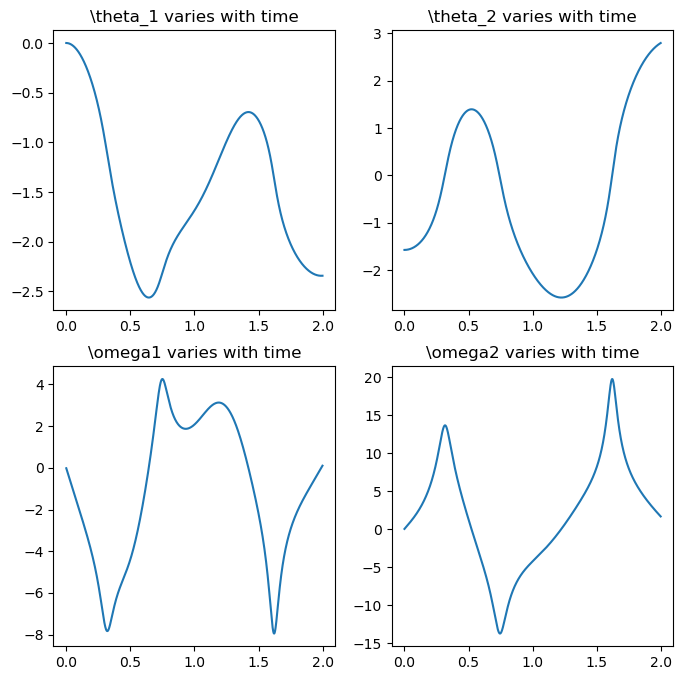

In [23]:

d2 = Droping(T = T, theta1 = 0, theta2 = -np.pi/2)
x1s2, x2s2, x3s2, x4s2 = d2.forward(steps)

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.plot(time, x1s2)
plt.title('\\theta_1 varies with time')
plt.subplot(222)
plt.plot(time, x2s2)
plt.title('\\theta_2 varies with time')
plt.subplot(223)
plt.plot(time, x3s2)
plt.title('\\omega1 varies with time')
plt.subplot(224)
plt.plot(time, x4s2)
plt.title('\\omega2 varies with time')
plt.show()

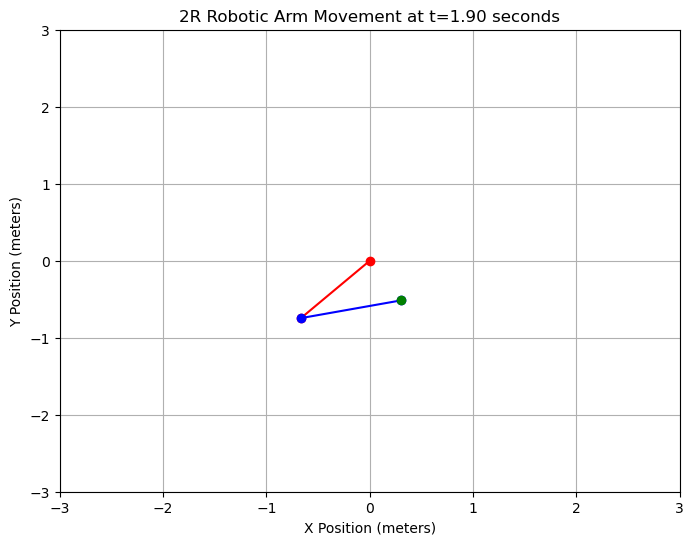

In [24]:
tj.plot_robot_arm_dynamics(steps, x1s2, x2s2, 1, 1, step=100)

In [25]:
import trajectory_identifacation as idt
from trajectory_identifacation import Identifacation
if __name__ == '__main__':
    steps = 1000
    T = 0.001
    time = np.arange(0, steps*T, T)

    dropping = Identifacation(T, theta1 = 0, theta2 =math.pi / 2)
    t1, t2, dt1, dt2, ddt1, ddt2, tau1, tau2 = dropping.forward(steps, T)

    # sampling to get H
    H = None
    tau = None
    start_point = 200
    for i in range(20):
        target = 30*i+start_point
        hi = idt.getH(t1[target], t2[target], dt1[target], dt2[target], ddt1[target], ddt2[target], 9.81)
        # taui = np.array([[ddt1[start_point]], [ddt2[start_point]]])
        taui = np.array([[tau1[target]], [tau2[target]]])
        if H is None:
            H = hi
            tau = taui
        else:
            H = np.vstack((H, hi))
            tau = np.vstack((tau, taui))


    theta0 = np.ones(H.shape[1]).astype(np.float64)

    w = idt.ls(H, tau) # least square
    print('w:', w)
    print('loss: ', idt.loss(H@w, tau))

    m1, m2, l1, l2 = idt.calParam(w)
    print('m1:', m1)
    print('m2:', m2)
    print('l1:', l1)
    print('l2:', l2)

w: [[0.47494151]
 [0.23729393]
 [0.23820651]
 [0.96341544]
 [0.4904512 ]]
loss:  0.01880740698975885
m1: 0.9814300980856119
m2: 1.0098060528167223
l1: 0.48382781497374056
l2: 0.4856885085731728
